# Correlation Analysis

## Imports

In [1]:
import sys 
sys.path.append('../scripts')

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
from sklearn.preprocessing import MinMaxScaler
from bokeh.models import Slope
from bokeh.palettes import Sunset10
from bokeh.plotting import figure, show

from helpers import get_graph_from_pickle, merge_graph_to_df

In [81]:
df_origin = pd.read_csv('../data/processed/preprocessed.csv', index_col=0)
df_origin.set_index('wikipedia_id', inplace=True)
print(df_origin.shape)
df_origin.head(5)

(13724, 9)


,name,release_year,rating,num_votes,plot,freebase_id,languages,countries,genres
wikipedia_id,,,,,,,,,
10109752,Miss Jerry,1894.0,5.3,207,After finding out that her father is suffering...,/m/02q23xk,['Silent film'],['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-..."
28703057,The Corbett-Fitzsimmons Fight,1897.0,5.3,484,The film no longer exists in its entirety; how...,/m/0czdh_n,[],[],['Sports']
142995,The Story of the Kelly Gang,1906.0,6.0,855,The Story of the Kelly Gangs tone is of sorrow...,/m/0120y4,['English Language'],['Australia'],"['Crime Fiction', 'Silent film', 'Biography', ..."
32986669,Robbery Under Arms,1907.0,4.3,25,Key scenes of the film included the branding o...,/m/04p7yxx,['Silent film'],['Australia'],"['Silent film', 'Drama']"
1090641,Atlantis,1913.0,6.5,459,"Dr. Friedrich von Kammacher , a surgeon, is de...",/m/0454v0,"['English Language', 'Danish Language']",['Denmark'],"['Silent film', 'Drama', 'Indie', 'Black-and-w..."


In [146]:
list_year = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

dfs = {}  # Dictionary to store the dataframes

for year in list_year:
    G = get_graph_from_pickle(year)
    df_year = merge_graph_to_df(df_origin, G) 
    df_year.drop(columns=['languages','plot','countries', 'freebase_id'], inplace=True)
    dfs[f"{year}"] = df_year

# Access the dataframes using dfs["df_year"]
df_all = pd.concat(dfs.values())



KeyError: '2012'

c:\Users\valen\.conda\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\valen\.conda\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


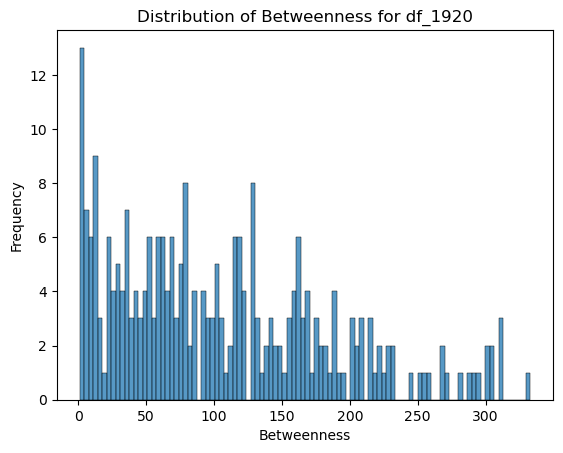

In [117]:
#let's look at the degree distribution 
sns.histplot(data=dfs["1920"], x="degree", bins=100)
plt.xlabel("Betweenness")
plt.ylabel("Frequency")
plt.title("Distribution of Betweenness for df_1920")
plt.show()


In [ ]:
df[['Column1', 'Column2']] = [value1, value2]


In [118]:
nb = 0
for df in dfs:
    nb += dfs[df].shape[0]
print(nb)
display(df_all.shape)

13615


(13615, 7)

In [119]:
# Here we scale the betweenness and degree columns for all the dataframes independently for each decade and for the whole dataset 
scaler = MinMaxScaler()
for df in dfs:
    df_used = dfs[df]
    df_use=d[['betweenness', 'degree']]  scaler.fit_transform(df_used[['betweenness', 'degree']])
    dfs[df] = df_used
df_all[['betweenness', 'degree']] = scaler.fit_transform(df_all[['betweenness', 'degree']])


In [134]:
correlation = df_all['rating'].corr(df_all['betweenness'])
print(correlation)


-0.04589039864051044


In [141]:
corelation_dict_betweenness = {}
corelation_dict_degree = {}
for df in dfs:
    df_used = dfs[df]
    corelation_dict_betweenness[df] = df_used['rating'].corr(df_used['betweenness'])
    corelation_dict_degree[df] = df_used['rating'].corr(df_used['degree'])

print(corelation_dict_betweenness)
print(corelation_dict_degree)
print("all_together",correlation)

{'1920': -0.09318562895190187, '1930': -0.08488182075047815, '1940': -0.11194937449344164, '1950': -0.11543154698133459, '1960': -0.10704267545324006, '1970': -0.13959517879165587, '1980': -0.09498534673248551, '1990': -0.15861748807878423, '2000': -0.11114475721929903, '2010': -0.11405503418333386}
{'1920': -0.037696863646889706, '1930': -0.013535687813201398, '1940': -0.08464351528196018, '1950': -0.10688014567191971, '1960': -0.06740200289338841, '1970': -0.05646662630211047, '1980': -0.07271122675388791, '1990': -0.1446192272656548, '2000': -0.12766625309461774, '2010': -0.15764307344059417}
all_together -0.04589039864051044


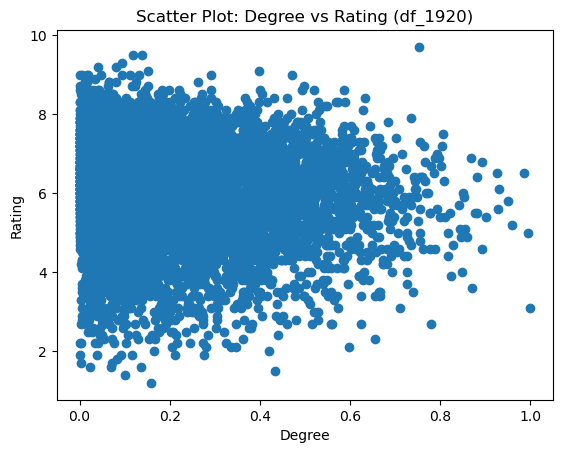

In [142]:
plt.scatter(df_all['degree'], df_all['rating'])
plt.xlabel('Degree')
plt.ylabel('Rating')
plt.title('Scatter Plot: Degree vs Rating (df_1920)')
plt.show()


In [145]:

df_fig = df_all
# linear equation parameters
slope, intercept = 2, 10

xpts = df_fig['rating']
ypts =df_fig['degree']

blue, yellow = Sunset10[0], Sunset10[5]

p = figure(width=600, height=600, x_axis_label='ratings', y_axis_label='degree',
           background_fill_color="#fafafa")
p.y_range.start = 0

p.circle(xpts, ypts, size=8, alpha=0.8, fill_color=yellow, line_color="black")

slope = Slope(gradient=slope, y_intercept=intercept,
              line_color=blue, line_dash='dashed', line_width=4)

p.add_layout(slope)

show(p)